In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs" in path: continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "__Route" in path: 
            try:
                int(path.split("Route")[1][:4])
                data["Scaling"] = str(path.split("Route")[1][:4])
            except:
                data["Scaling"] = str(path.split("Route")[1][:3])

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

/tmp/ipykernel_88469/152259554.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


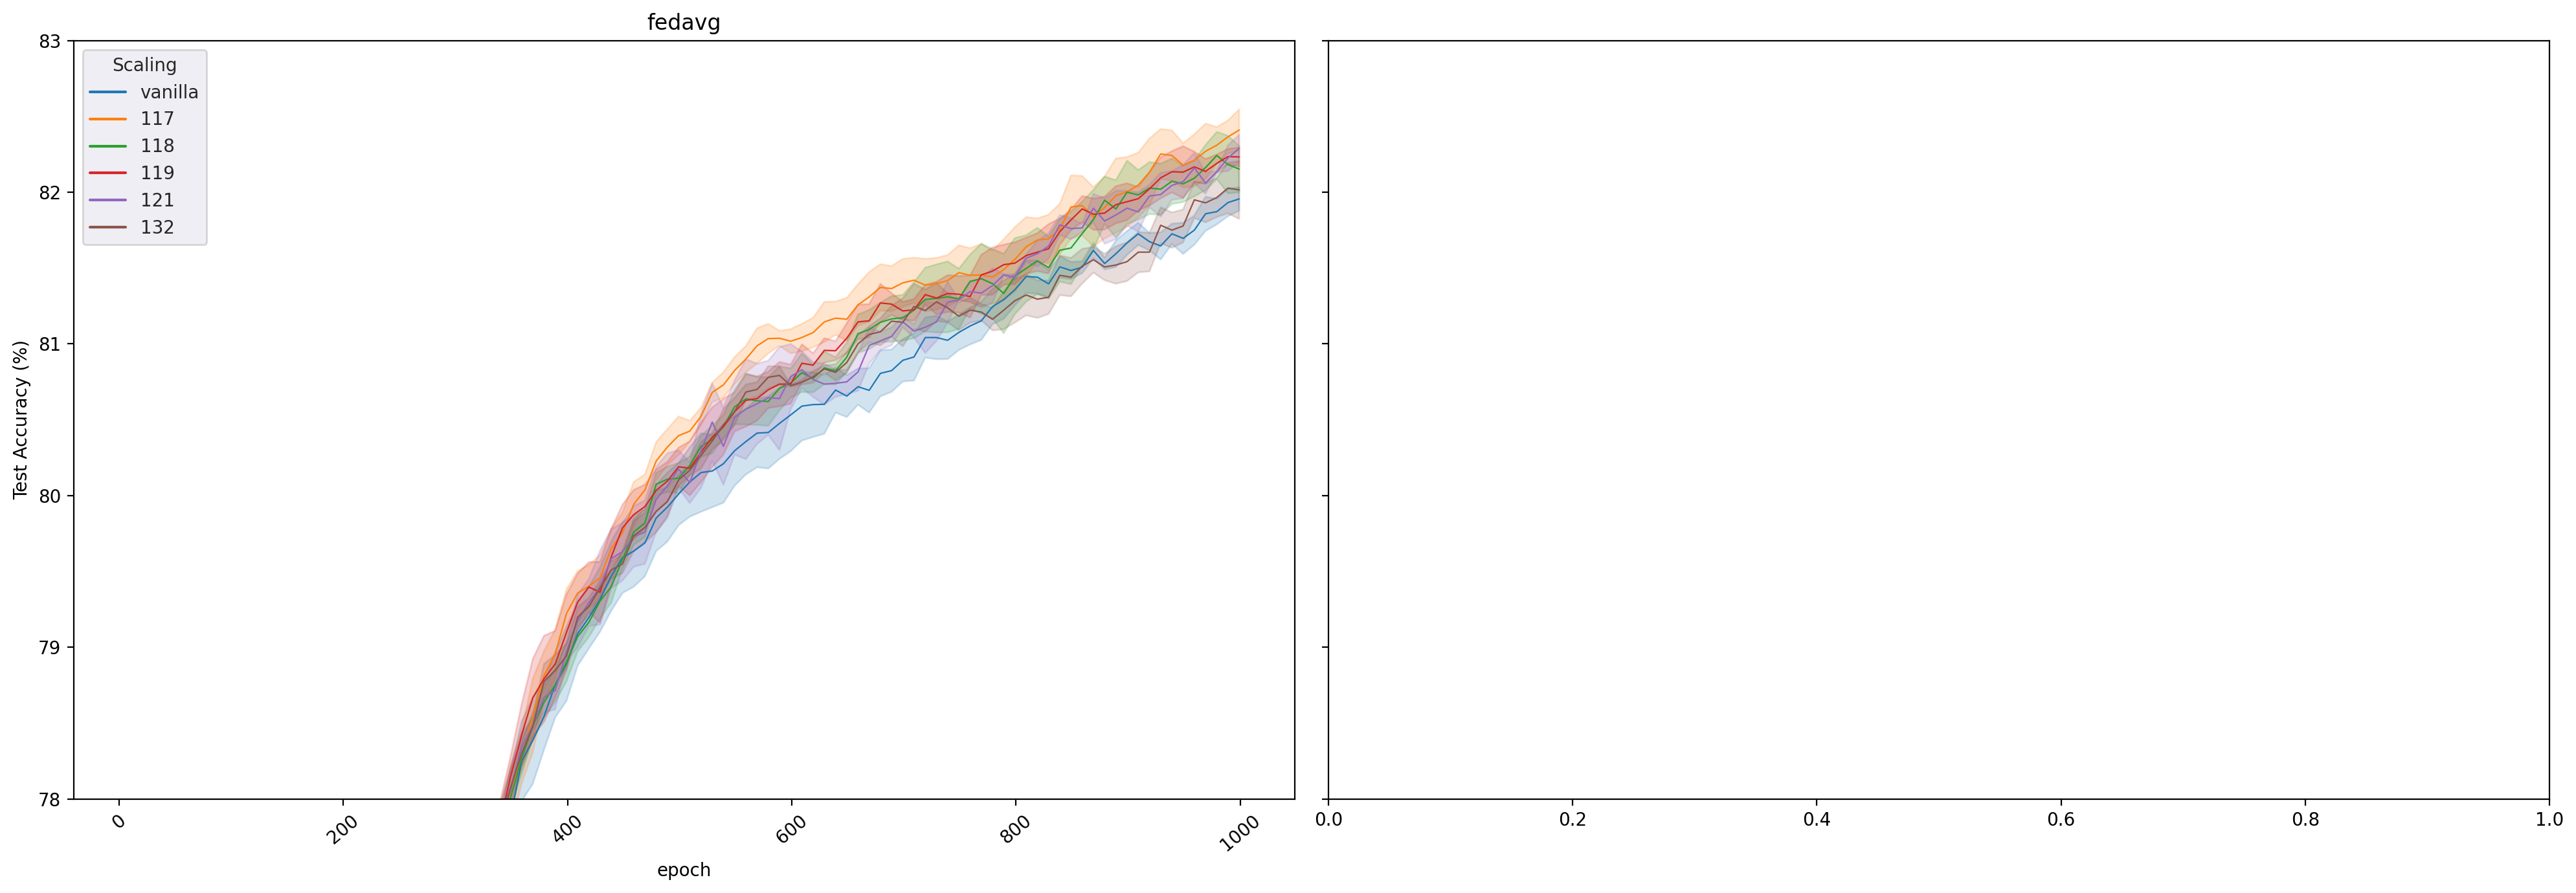

In [4]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp3 = load_data("../Output_route/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

In [5]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])
data_temp3 = load_data("../Output_route/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=150, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        
        sk = ["vanilla", "113", "114", "115"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": 
                         {
                             # "112": "50%", 
                          "113": "60%", 
                          "114": "70%", 
                          "115": "80%", 
                          # "116": "90%"
                         }
                     })
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([80, 83])
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title("CIFAR10 (IID Label Distribution)")
        # ax.set_xlabel("# communications")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

KeyError: "['113', '114', '115'] not in index"

In [ ]:
temp["mode"].unique()

array(['fedavg'], dtype=object)

In [ ]:
## CIFAR100

/tmp/ipykernel_4008032/4103158773.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


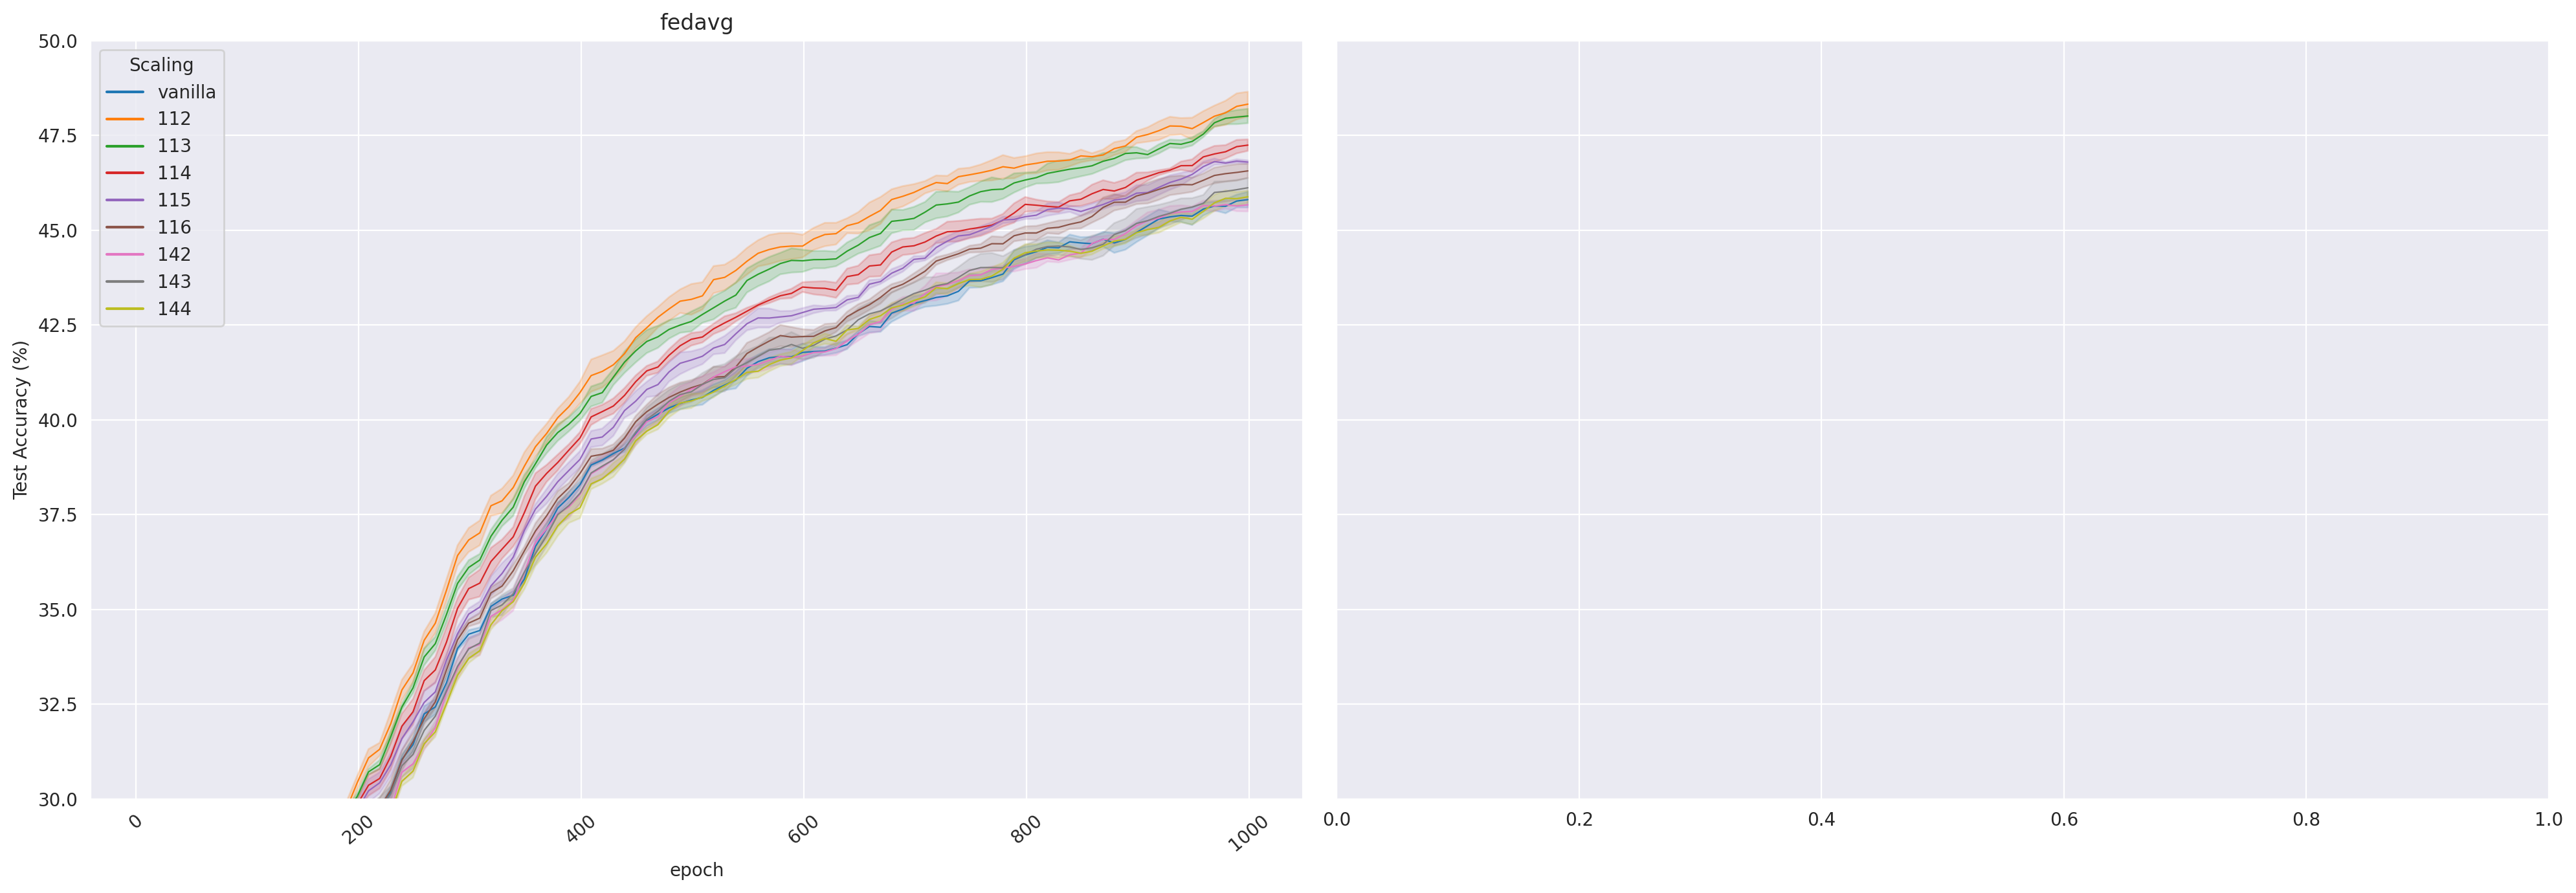

In [ ]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 50])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

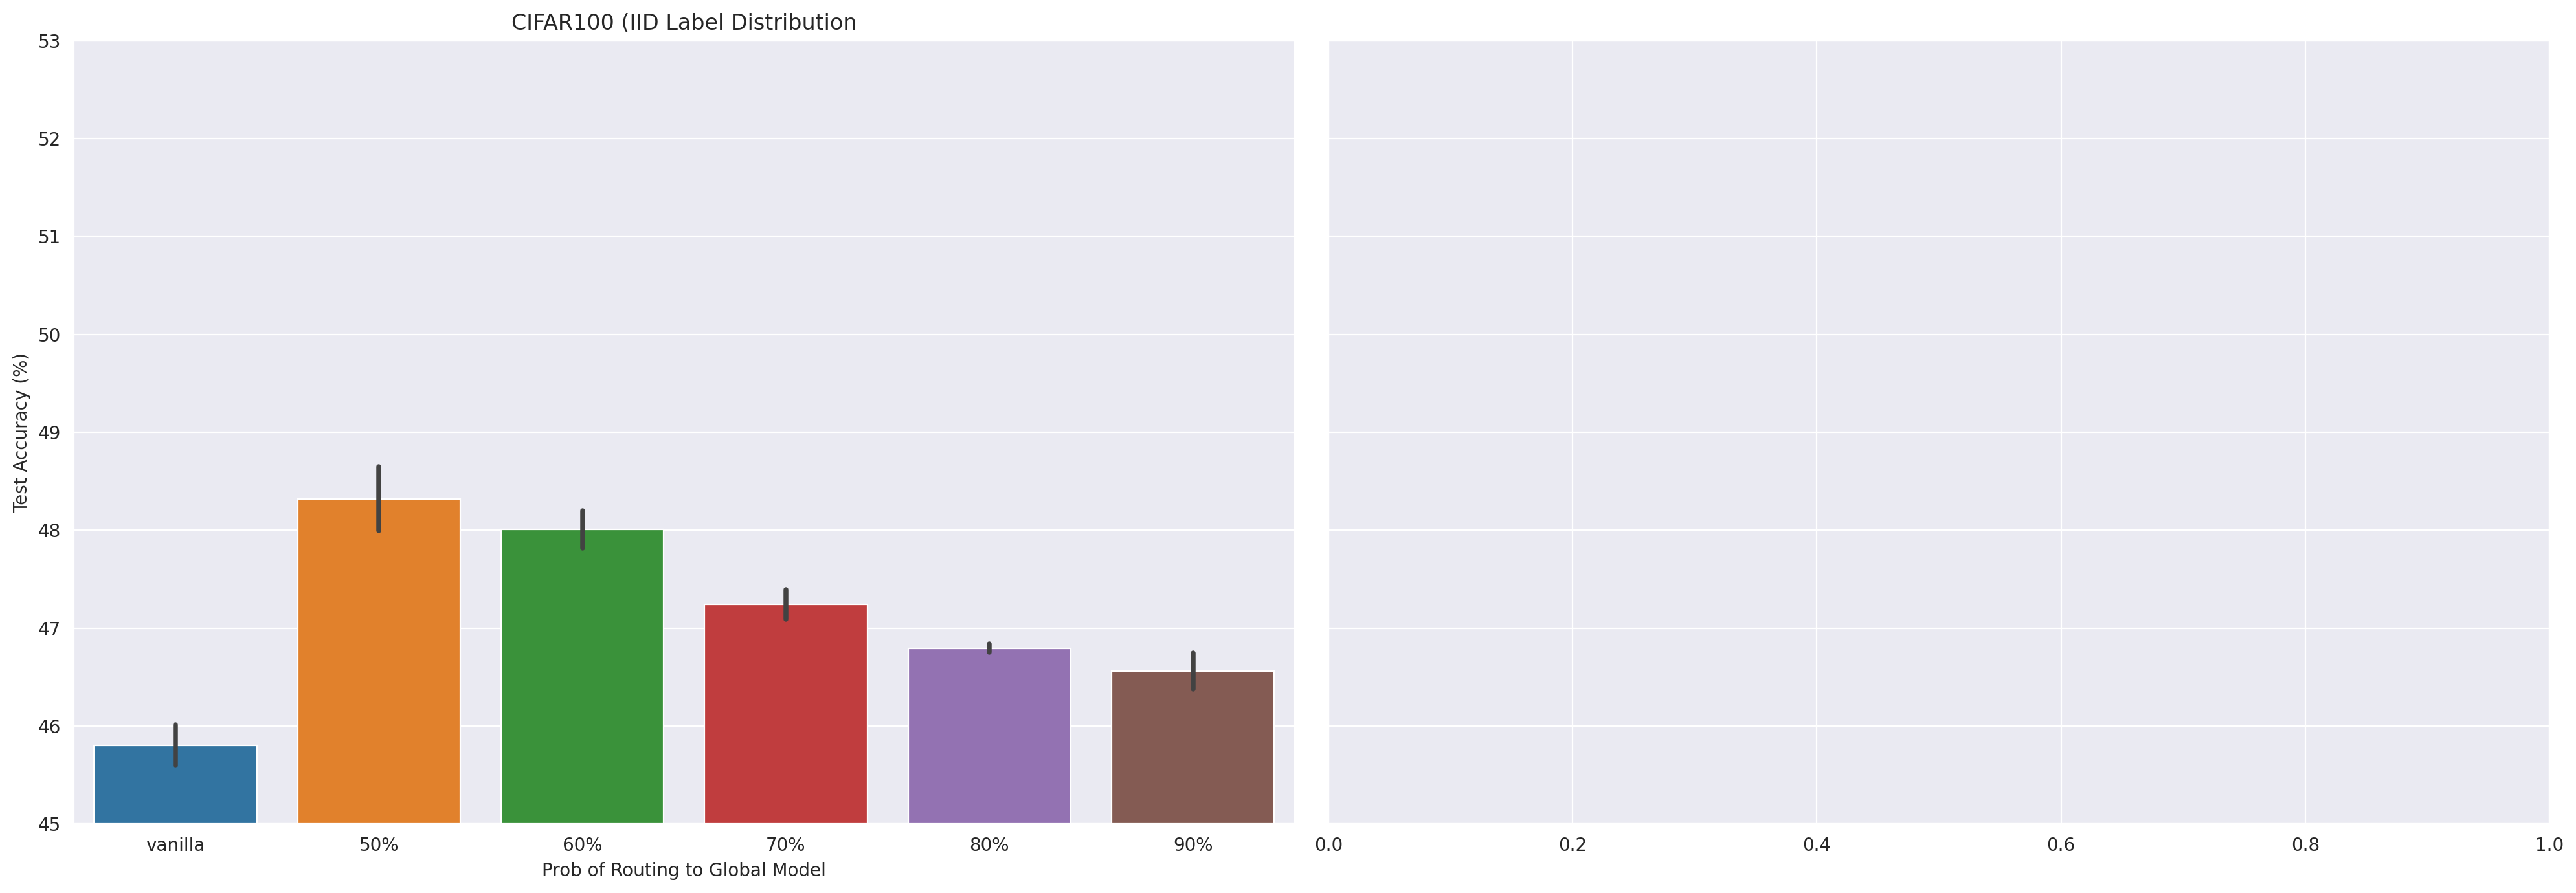

In [ ]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", "112", "113", "114", "115", "116"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": 
                         {"112": "50%", 
                          "113": "60%", 
                          "114": "70%", 
                          "115": "80%", 
                          "116": "90%"}
                     })
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xlabel("# communications")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)